In [1]:
% matplotlib inline

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 10, 10

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

In [25]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [9]:
# columns = "age sex bmi map tc ldl hdl tch ltg glu".split()
# diabetes = datasets.load_diabetes()
# columns

In [10]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [12]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
y = boston.target

In [69]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.5)
print x_train.shape, y_train.shape
print x_test.shape, y_test.shape

(253, 13) (253,)
(253, 13) (253,)


Score: 0.70889512768


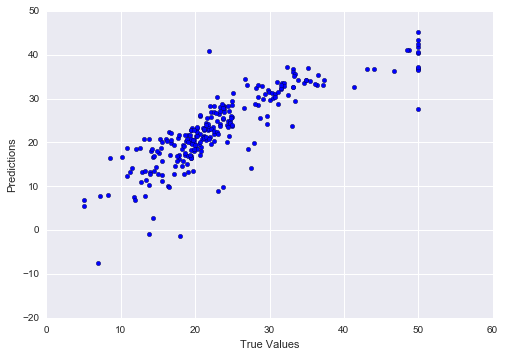

In [70]:
# y is boston.target
# df is boston

x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.5)
lm = linear_model.LinearRegression()    ## initialize regression object
model = lm.fit(x_train, y_train)        ## fits model to data for training set
predictions = lm.predict(x_test)        ## predict based on the test set, not the training set

plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(x_test, y_test)


Cross-validated scores: [ 0.60157044  0.60368748  0.35870794 -1.12403993]
Cross-Predicted Accuracy: 0.537671767736


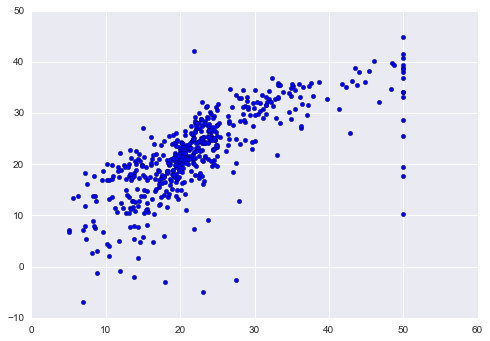

In [40]:
# Perform 6-fold cross validation
scores = cross_val_score(lm, df, y, cv=4)  ## 6-fold cross-validation
print "Cross-validated scores:", scores
# # Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)
accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy

In [36]:
np.mean(scores)

0.10998148405588754

In [32]:
predictions.shape

(506,)

In [ ]:
#MEDV ~ LSTAT + RM + TAX + NOX + B + RAD + DIS + CHAS + ZN"


In [83]:
fifty_fifty = []
for i in range(1,50):
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.5)
    lm = linear_model.LinearRegression()   
    model = lm.fit(x_train, y_train)       
    predictions = lm.predict(x_test)       
    fifty_fifty.append(model.score(x_test, y_test))
print "50/50 Std: ", np.std(fifty_fifty)

sixty_fourty = []
for i in range(1,50):
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.4)
    lm = linear_model.LinearRegression()   
    model = lm.fit(x_train, y_train)       
    predictions = lm.predict(x_test)      
    sixty_fourty.append(model.score(x_test, y_test))
print "60/40 Std: ", np.std(sixty_fourty)

ninety_ten = []
for i in range(1,50):
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.1)
    lm = linear_model.LinearRegression()   
    model = lm.fit(x_train, y_train)     
    predictions = lm.predict(x_test)    
    ninety_ten.append(model.score(x_test, y_test))
print "90/10 Std: ", np.std(ninety_ten)

50/50 Std:  0.0316716069574
60/40 Std:  0.033443801251
90/10 Std:  0.0831581156228


In [ ]:
# y is boston.target
# df is boston
#MEDV ~ LSTAT + RM + TAX + NOX + B + RAD + DIS + CHAS + ZN"
#df.iloc[:,[1,2,4]]

In [89]:
df.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT'],
      dtype='object')

In [97]:
# test1 = df.iloc[:, [12,5,9,4,11,8,7,3,1]]
test1 = df[['LSTAT', 'RM', 'TAX', 'NOX', 'B', 'RAD', 'DIS', 'CHAS', 'ZN']]
test2 = df[['LSTAT', 'RM', 'TAX', 'NOX', 'B', 'RAD', 'DIS', 'CHAS', 'ZN']]

Test Score: 0.632841798417
Train RSquare: 0.750721975808


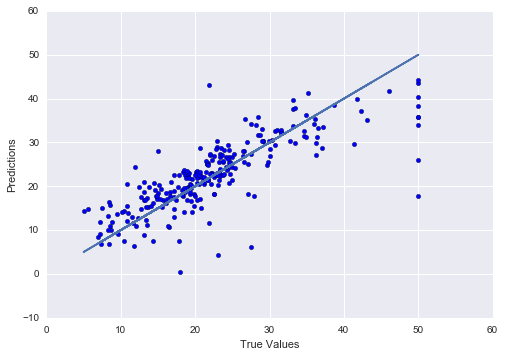

In [103]:
test1 = df[['LSTAT', 'RM', 'TAX', 'NOX', 'B', 'RAD', 'DIS', 'CHAS', 'ZN']]
x_train, x_test, y_train, y_test = train_test_split(test1, y, test_size=0.5)
lm = linear_model.LinearRegression()    ## initialize regression object
model = lm.fit(x_train, y_train)        ## fits model to data for training set
predictions = lm.predict(x_test)        ## predict based on the test set, not the training set

plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot(y,y)

print "Test Score:", model.score(x_test, y_test)
print "Train RSquare:", model.score(x_train, y_train)


Test Score: 0.613758501961
Train RSquare: 0.670611044343


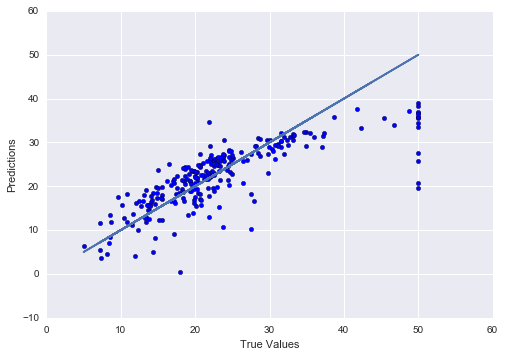

In [105]:
test2 = df[['LSTAT', 'RM', 'TAX', 'NOX']]
x_train, x_test, y_train, y_test = train_test_split(test2, y, test_size=0.5)
lm = linear_model.LinearRegression()    ## initialize regression object
model = lm.fit(x_train, y_train)        ## fits model to data for training set
predictions = lm.predict(x_test)        ## predict based on the test set, not the training set

plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.plot(y,y)

print "Test Score:", model.score(x_test, y_test)
print "Train RSquare:", model.score(x_train, y_train)